# Polarization results

This notebook replicates the results for the polarization case presented in the ForSE paper:
https://arxiv.org/pdf/2011.02221.pdf

In [1]:
from forse.networks.dcgan import *
import matplotlib.pyplot as plt
from forse.tools import *

Using TensorFlow backend.


#### Path to directories with data and NN weights 
the path below is the one for NERSC repos

In [2]:
dir_data = '/global/cfs/cdirs/sobs/www/users/ForSE/NN_datautils/datasets/'
dir_models = '/global/cfs/cdirs/sobs/www/users/ForSE/NN_datautils/weights/'

#### load generator weights for Q

In [3]:
dcganQ = DCGAN(output_directory='./', img_size=(320, 320))
dcganQ.generator = load_model(dir_models+'forse_generator_Q.h5')

/global/homes/k/krach/usr/python_prefix_3.7/lib/python3.7/site-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


#### load files with patches
In the first file the first column has the total intensity small scales, while the second the large scale stokes Q maps (the total intensity small scales have been used to train the network, as explained in the paper, and represent our target distribution)

The second file has Stokes Q maps where small scales (below 80 amin) have been added as Gaussian realizaion of the extrapolation of the power spectra

In [4]:
Thr, Ls_Q = np.load(dir_data+'GNILC_Thr12_Qlr80_20x20deg_Npix320_full_sky_adaptive.npy', allow_pickle=True)[:, 0:174]
Ss_gaussQ = np.load(dir_data+'GNILC_gaussian_ss_Q_20x20deg_Npix320_full_sky_adaptive.npy',  allow_pickle=True)

here we rescale all the maps in the range [-1, 1]

In [5]:
Ss_ratio_Q = Ss_gaussQ/Ls_Q
npatches = len(Ss_gaussQ)
Ss_ratio_scaled_Q = np.copy(Ss_ratio_Q)
Ls_scaled_Q = np.copy(Ls_Q)
for i in range(0, npatches):
    Ss_ratio_scaled_Q[i] = rescale_min_max(Ss_ratio_Q[i])
    Ls_scaled_Q[i] = rescale_min_max(Ls_Q[i])
Ls_scaled_Q = Ls_scaled_Q.reshape((npatches, 320, 320, 1))
Ss_ratio_scaled_Q = Ss_ratio_scaled_Q.reshape((npatches, 320, 320, 1))

and generate small scale features

In [6]:
NNout_Q = dcganQ.generator.predict(Ls_scaled_Q)

#### generate small scales for U
same procedure used for Q maps

In [8]:
dcganU = DCGAN(output_directory='./', img_size=(320, 320))
dcganU.generator = load_model(dir_models+'forse_generator_U.h5')

/global/homes/k/krach/usr/python_prefix_3.7/lib/python3.7/site-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [9]:
Ls_U = np.load(dir_data+'training_set_GNILC_full_sky_patches_20x20deg_T_HR12amin_U_LR80amin_Npix320_adaptive_upd.npy', allow_pickle=True)[1, 0:174]
Ss_gaussU = np.load(dir_data+'GNILC_gaussian_ss_U_20x20deg_Npix320_full_sky_adaptive.npy',  allow_pickle=True)

In [10]:
Ss_ratio_U = Ss_gaussU/Ls_U
npatches = len(Ss_gaussU)
Ss_ratio_scaled_U = np.copy(Ss_ratio_U)
Ls_scaled_U = np.copy(Ls_U)
for i in range(0, npatches):
    Ss_ratio_scaled_U[i] = rescale_min_max(Ss_ratio_U[i])
    Ls_scaled_U[i] = rescale_min_max(Ls_U[i])
Ls_scaled_U = Ls_scaled_U.reshape((npatches, 320, 320, 1))
Ss_ratio_scaled_U = Ss_ratio_scaled_U.reshape((npatches, 320, 320, 1))

In [11]:
NNout_U = dcganU.generator.predict(Ls_scaled_U)

#### Plot generated small scales 
Figure 6 in ForSE paper


([<matplotlib.axis.XTick at 0x2aafe3b54b10>,
 <a list of 3 Text xticklabel objects>)

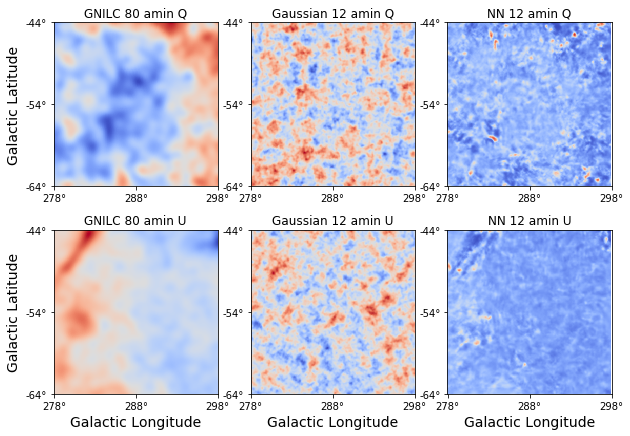

In [12]:
expl = 33

cmap = 'coolwarm'
plt.figure(figsize=(10, 7))
plt.subplot(231)
plt.imshow(Ls_scaled_Q[expl,:, :,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.title('GNILC 80 amin Q')
plt.yticks((0, 160, 320), ('-44°', '-54°', '-64°') )
plt.xticks((0, 160, 320), ('278°', '288°', '298°') )
plt.ylabel('Galactic Latitude', fontsize=14)

plt.subplot(232)
plt.imshow(Ss_ratio_scaled_Q[expl,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Gaussian 12 amin Q')
#plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('-44°', '-54°', '-64°') )
plt.xticks((0, 160, 320), ('278°', '288°', '298°') )

plt.subplot(233)
plt.imshow(NNout_Q[expl,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.title('NN 12 amin Q')
plt.yticks((0, 160, 320), ('-44°', '-54°', '-64°') )
plt.xticks((0, 160, 320), ('278°', '288°', '298°') )

plt.subplot(234)
plt.imshow(Ls_scaled_U[expl,:, :,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.title('GNILC 80 amin U')
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('-44°', '-54°', '-64°') )
plt.xticks((0, 160, 320), ('278°', '288°', '298°') )
plt.ylabel('Galactic Latitude', fontsize=14)


plt.subplot(235)
plt.imshow(Ss_ratio_scaled_U[expl,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Gaussian 12 amin U')
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('-44°', '-54°', '-64°') )
plt.xticks((0, 160, 320), ('278°', '288°', '298°') )

plt.subplot(236)
plt.imshow(NNout_U[expl,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.title('NN 12 amin U')
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('-44°', '-54°', '-64°') )
plt.xticks((0, 160, 320), ('278°', '288°', '298°') )


#### compute and plot minkowski functionals 
for both Q and U patches.
Figure 7 in ForSE paper


In [13]:
rhos_gss, f_gss, u_gss, chi_gss = [], [], [], []    
rhos_nn, f_nn, u_nn, chi_nn = [], [], [], []  
rhos_t, f_t, u_t, chi_t = [], [], [], []
for i in range(0,npatches):
    rhos_Y, f_Y, u_Y, chi_Y = get_functionals(Ss_ratio_scaled_Q[i,:,:,0])
    mNN = rescale_min_max(NNout_Q[i,:,:,0], return_min_max=False)
    rhos_NN, f_NN, u_NN, chi_NN= get_functionals(mNN)
    mT = rescale_min_max(Thr[i], return_min_max=False)
    rhos_T, f_T, u_T, chi_T= get_functionals(mT)
    f_gss.append(f_Y)
    f_nn.append(f_NN)
    f_t.append(f_T)
    u_gss.append(u_Y)
    u_nn.append(u_NN)
    u_t.append(u_T)
    chi_gss.append(chi_Y)
    chi_nn.append(chi_NN)
    chi_t.append(chi_T)

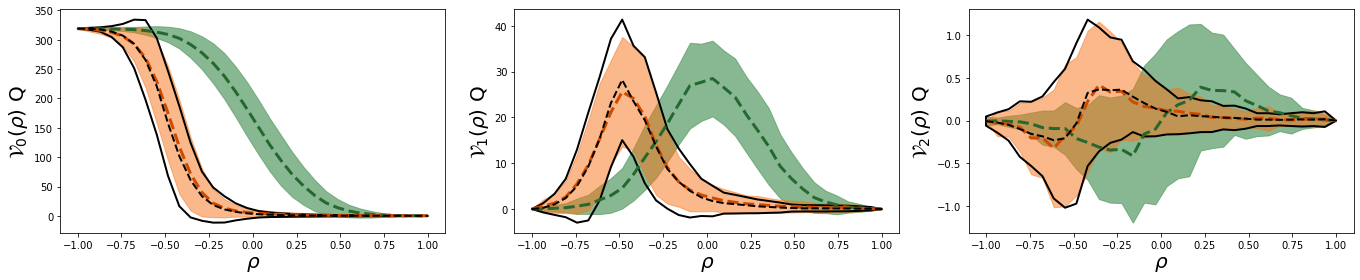

In [14]:
f_gss = np.array(f_gss)
f_nn = np.array(f_nn)
f_t = np.array(f_t)
u_gss = np.array(u_gss)
u_nn = np.array(u_nn)
u_t = np.array(u_t)
chi_gss = np.array(chi_gss)
chi_nn = np.array(chi_nn)
chi_t = np.array(chi_t)
plt.figure(figsize=(19, 4))

plt.subplot(131)
plt.fill_between(rhos_Y, 
                     np.mean(f_gss, axis=0)-np.std(f_gss, axis=0), 
                     np.mean(f_gss, axis=0)+np.std(f_gss, axis=0), 
                     lw=1, label='gauss 12a', alpha=0.7, color='#569A62')
plt.plot(rhos_Y, np.mean(f_gss, axis=0), lw=3, ls='--', color='#246830')
plt.fill_between(rhos_Y, 
                     np.mean(f_nn, axis=0)-np.std(f_nn, axis=0), 
                     np.mean(f_nn, axis=0)+np.std(f_nn, axis=0), 
                     lw=1, label='NN 12a', alpha=0.5, color='#F87217')
plt.plot(rhos_Y, np.mean(f_nn, axis=0), lw=3, ls='--', color='#D04A00')
plt.fill_between(rhos_Y, 
                     np.mean(f_t, axis=0)-np.std(f_t, axis=0), 
                     np.mean(f_t, axis=0)+np.std(f_t, axis=0), 
                     lw=2, label='GNILC T 12a', edgecolor='black', facecolor='')
plt.plot(rhos_Y, np.mean(f_t, axis=0), lw=2, ls='--', color='black')
plt.xlabel(r'$\rho$', fontsize=20)
plt.ylabel(r'$\mathcal{V}_0(\rho$) Q', fontsize=20)

plt.subplot(132)
plt.fill_between(rhos_Y, 
                     np.mean(u_gss, axis=0)-np.std(u_gss, axis=0), 
                     np.mean(u_gss, axis=0)+np.std(u_gss, axis=0), 
                     lw=1, label='gauss 12a', alpha=0.7, color='#569A62')
plt.plot(rhos_Y, np.mean(u_gss, axis=0), lw=3, ls='--', color='#246830')
plt.fill_between(rhos_Y, 
                     np.mean(u_nn, axis=0)-np.std(u_nn, axis=0), 
                     np.mean(u_nn, axis=0)+np.std(u_nn, axis=0), 
                     lw=1, label='NN 12a', alpha=0.5, color='#F87217')
plt.plot(rhos_Y, np.mean(u_nn, axis=0), lw=3, ls='--', color='#D04A00')
plt.fill_between(rhos_Y, 
                     np.mean(u_t, axis=0)-np.std(u_t, axis=0), 
                     np.mean(u_t, axis=0)+np.std(u_t, axis=0), 
                     lw=2, label='GNILC T 12a', edgecolor='black', facecolor='')
plt.plot(rhos_Y, np.mean(u_t, axis=0), lw=2, ls='--', color='black')
plt.xlabel(r'$\rho$', fontsize=20)
plt.ylabel(r'$\mathcal{V}_1(\rho$) Q', fontsize=20)

plt.subplot(133)
plt.fill_between(rhos_Y, 
                     np.mean(chi_gss, axis=0)-np.std(chi_gss, axis=0), 
                     np.mean(chi_gss, axis=0)+np.std(chi_gss, axis=0), 
                     lw=1, label='gauss 12a', alpha=0.7, color='#569A62')
plt.plot(rhos_Y, np.mean(chi_gss, axis=0), lw=3, ls='--', color='#246830')

plt.fill_between(rhos_Y, 
                     np.mean(chi_nn, axis=0)-np.std(chi_nn, axis=0), 
                     np.mean(chi_nn, axis=0)+np.std(chi_nn, axis=0), 
                     lw=1, label='NN 12a', alpha=0.5, color='#F87217')
plt.plot(rhos_Y, np.mean(chi_nn, axis=0), lw=3, ls='--', color='#D04A00')
plt.fill_between(rhos_Y, 
                     np.mean(chi_t, axis=0)-np.std(chi_t, axis=0), 
                     np.mean(chi_t, axis=0)+np.std(chi_t, axis=0), 
                     lw=2, label='GNILC T 12a', edgecolor='black', facecolor='')
plt.plot(rhos_Y, np.mean(chi_t, axis=0), lw=2, ls='--', color='black')
plt.xlabel(r'$\rho$', fontsize=20)
plt.ylabel(r'$\mathcal{V}_2(\rho$) Q', fontsize=20)
plt.tight_layout()

In [15]:
rhos_gss, f_gss, u_gss, chi_gss = [], [], [], []    
rhos_nn, f_nn, u_nn, chi_nn = [], [], [], []  
for i in range(0,npatches):
    rhos_Y, f_Y, u_Y, chi_Y = get_functionals(Ss_ratio_scaled_U[i,:,:,0])
    mNN = rescale_min_max(NNout_U[i,:,:,0], return_min_max=False)
    rhos_NN, f_NN, u_NN, chi_NN= get_functionals(mNN)
    f_gss.append(f_Y)
    f_nn.append(f_NN)
    u_gss.append(u_Y)
    u_nn.append(u_NN)
    chi_gss.append(chi_Y)
    chi_nn.append(chi_NN)

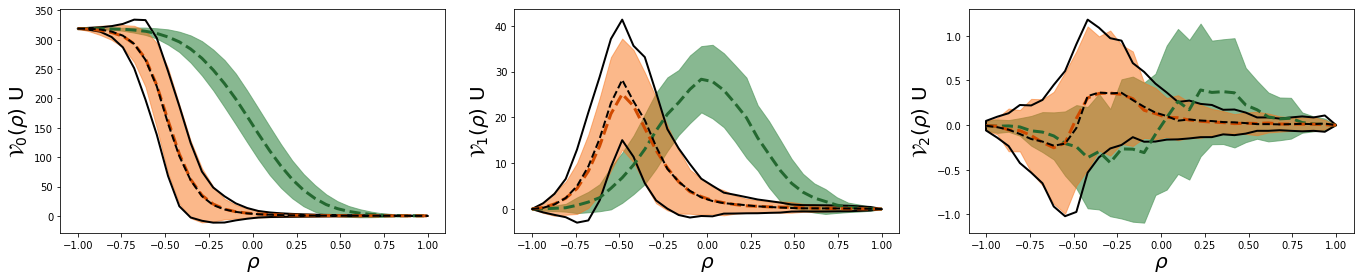

In [16]:
f_gss = np.array(f_gss)
f_nn = np.array(f_nn)
f_t = np.array(f_t)
u_gss = np.array(u_gss)
u_nn = np.array(u_nn)
u_t = np.array(u_t)
chi_gss = np.array(chi_gss)
chi_nn = np.array(chi_nn)
chi_t = np.array(chi_t)
plt.figure(figsize=(19, 4))

plt.subplot(131)
plt.fill_between(rhos_Y, 
                     np.mean(f_gss, axis=0)-np.std(f_gss, axis=0), 
                     np.mean(f_gss, axis=0)+np.std(f_gss, axis=0), 
                     lw=1, label='gauss 12a', alpha=0.7, color='#569A62')
plt.plot(rhos_Y, np.mean(f_gss, axis=0), lw=3, ls='--', color='#246830')
plt.fill_between(rhos_Y, 
                     np.mean(f_nn, axis=0)-np.std(f_nn, axis=0), 
                     np.mean(f_nn, axis=0)+np.std(f_nn, axis=0), 
                     lw=1, label='NN 12a', alpha=0.5, color='#F87217')
plt.plot(rhos_Y, np.mean(f_nn, axis=0), lw=3, ls='--', color='#D04A00')
plt.fill_between(rhos_Y, 
                     np.mean(f_t, axis=0)-np.std(f_t, axis=0), 
                     np.mean(f_t, axis=0)+np.std(f_t, axis=0), 
                     lw=2, label='GNILC T 12a', edgecolor='black', facecolor='')
plt.plot(rhos_Y, np.mean(f_t, axis=0), lw=2, ls='--', color='black')


plt.xlabel(r'$\rho$', fontsize=20)
plt.ylabel(r'$\mathcal{V}_0(\rho$) U', fontsize=20)

plt.subplot(132)
plt.fill_between(rhos_Y, 
                     np.mean(u_gss, axis=0)-np.std(u_gss, axis=0), 
                     np.mean(u_gss, axis=0)+np.std(u_gss, axis=0), 
                     lw=1, label='gauss 12a', alpha=0.7, color='#569A62')
plt.plot(rhos_Y, np.mean(u_gss, axis=0), lw=3, ls='--', color='#246830')
plt.fill_between(rhos_Y, 
                     np.mean(u_nn, axis=0)-np.std(u_nn, axis=0), 
                     np.mean(u_nn, axis=0)+np.std(u_nn, axis=0), 
                     lw=1, label='NN 12a', alpha=0.5, color='#F87217')
plt.plot(rhos_Y, np.mean(u_nn, axis=0), lw=3, ls='--', color='#D04A00')
plt.fill_between(rhos_Y, 
                     np.mean(u_t, axis=0)-np.std(u_t, axis=0), 
                     np.mean(u_t, axis=0)+np.std(u_t, axis=0), 
                     lw=2, label='GNILC T 12a', edgecolor='black', facecolor='')
plt.plot(rhos_Y, np.mean(u_t, axis=0), lw=2, ls='--', color='black')
plt.xlabel(r'$\rho$', fontsize=20)
plt.ylabel(r'$\mathcal{V}_1(\rho$) U', fontsize=20)

plt.subplot(133)
plt.fill_between(rhos_Y, 
                     np.mean(chi_gss, axis=0)-np.std(chi_gss, axis=0), 
                     np.mean(chi_gss, axis=0)+np.std(chi_gss, axis=0), 
                     lw=1, label='gauss 12a', alpha=0.7, color='#569A62')
plt.plot(rhos_Y, np.mean(chi_gss, axis=0), lw=3, ls='--', color='#246830')

plt.fill_between(rhos_Y, 
                     np.mean(chi_nn, axis=0)-np.std(chi_nn, axis=0), 
                     np.mean(chi_nn, axis=0)+np.std(chi_nn, axis=0), 
                     lw=1, label='NN 12a', alpha=0.5, color='#F87217')
plt.plot(rhos_Y, np.mean(chi_nn, axis=0), lw=3, ls='--', color='#D04A00')
plt.fill_between(rhos_Y, 
                     np.mean(chi_t, axis=0)-np.std(chi_t, axis=0), 
                     np.mean(chi_t, axis=0)+np.std(chi_t, axis=0), 
                     lw=2, label='GNILC T 12a', edgecolor='black', facecolor='')
plt.plot(rhos_Y, np.mean(chi_t, axis=0), lw=2, ls='--', color='black')
plt.xlabel(r'$\rho$', fontsize=20)
plt.ylabel(r'$\mathcal{V}_2(\rho$) U', fontsize=20)
plt.tight_layout()

### First normalization to phyiscal units
we normalize the generated small scales to physical units by using the information on mean and standard deviation taken from the Gaussian ones, for both Q and U

In [16]:
NNout_normed_Q = np.copy(NNout_Q)
NNout_normed_U = np.copy(NNout_U)
for i in range(npatches):
    NNout_normed_Q[i] = NNout_normed_Q[i]/np.std(NNout_normed_Q[i])*np.std(Ss_ratio_Q[i])
    NNout_normed_Q[i] = NNout_normed_Q[i]-np.mean(NNout_normed_Q[i])+np.mean(Ss_ratio_Q[i])
    NNout_normed_U[i] = NNout_normed_U[i]/np.std(NNout_normed_U[i])*np.std(Ss_ratio_U[i])
    NNout_normed_U[i] = NNout_normed_U[i]-np.mean(NNout_normed_U[i])+np.mean(Ss_ratio_U[i])

In [17]:
NNmapQ = NNout_normed_Q[:,:,:,0]*Ls_Q*1e6
LSmapQ = Ls_Q*1e6
SSmapQ = Ss_gaussQ*1e6
NNmapU = NNout_normed_U[:,:,:,0]*Ls_U*1e6
LSmapU = Ls_U*1e6
LSmapU = Ss_gaussU*1e6

In [18]:
import pymaster as nmt

In [19]:
Lx = np.radians(20.)
Ly = np.radians(20.)
Nx = 320
Ny = 320

In [20]:
mask = np.ones_like(LSmapQ[0]).flatten()
xarr = np.ones(Ny)[:, None] * np.arange(Nx)[None, :] * Lx/Nx
yarr = np.ones(Nx)[None, :] * np.arange(Ny)[:, None] * Ly/Ny
mask[np.where(xarr.flatten() < Lx / 100.)] = 0
mask[np.where(xarr.flatten() > 99 * Lx / 100.)] = 0
mask[np.where(yarr.flatten() < Ly / 100.)] = 0
mask[np.where(yarr.flatten() > 99 * Ly / 100.)] = 0
mask = mask.reshape([Ny, Nx])
mask = nmt.mask_apodization_flat(mask, Lx, Ly, aposize=2., apotype="C1")

In [21]:
l0_bins = np.arange(20, 1000, 40)
lf_bins = np.arange(20, 1000, 40)+39
b = nmt.NmtBinFlat(l0_bins, lf_bins)
ells_uncoupled = b.get_effective_ells()

In [22]:
f_SSQ = nmt.NmtFieldFlat(Lx, Ly, mask, [SSmapQ[0]/LSmapQ[0]])
w00 = nmt.NmtWorkspaceFlat()
w00.compute_coupling_matrix(f_SSQ, f_SSQ, b)

In [23]:
NNmapQ_corr = np.copy(NNmapQ)
NNmapU_corr = np.copy(NNmapU)
for N in range(0, 174):
    f_SSQ = nmt.NmtFieldFlat(Lx, Ly, mask, [SSmapQ[N]/LSmapQ[N]])
    cl_SS_coupledQ = nmt.compute_coupled_cell_flat(f_SSQ, f_SSQ, b)
    cl_SS_uncoupledQ = w00.decouple_cell(cl_SS_coupledQ)
    f_SSU = nmt.NmtFieldFlat(Lx, Ly, mask, [SSmapU[N]/LSmapU[N]])
    cl_SS_coupledU = nmt.compute_coupled_cell_flat(f_SSU, f_SSU, b)
    cl_SS_uncoupledU = w00.decouple_cell(cl_SS_coupledU)
    f_NNQ = nmt.NmtFieldFlat(Lx, Ly, mask, [NNmapQ[N]/LSmapQ[N]])
    cl_NN_coupledQ = nmt.compute_coupled_cell_flat(f_NNQ, f_NNQ, b)
    cl_NN_uncoupledQ = w00.decouple_cell(cl_NN_coupledQ)
    f_NNU = nmt.NmtFieldFlat(Lx, Ly, mask, [NNmapU[N]/LSmapU[N]])
    cl_NN_coupledU = nmt.compute_coupled_cell_flat(f_NNU, f_NNU, b)
    cl_NN_uncoupledU = w00.decouple_cell(cl_NN_coupledU)
    newQ = NNmapQ[N]/np.sqrt(np.mean(cl_NN_uncoupledQ[0][4:]/cl_SS_uncoupledQ[0][4:]))
    newU = NNmapU[N]/np.sqrt(np.mean(cl_NN_uncoupledU[0][4:]/cl_SS_uncoupledU[0][4:]))
    newQ = ((newQ/LSmapQ[N])-np.mean(newQ/LSmapQ[N])+np.mean(SSmapQ[N]/LSmapQ[N]))*LSmapQ[N]
    newU = ((newU/LSmapU[N])-np.mean(newU/LSmapU[N])+np.mean(SSmapU[N]/LSmapU[N]))*LSmapU[N]
    NNmapQ_corr[N] = newQ
    NNmapU_corr[N] = newU

([<matplotlib.axis.YTick at 0x7fa6f2a24b00>,
 <a list of 3 Text yticklabel objects>)

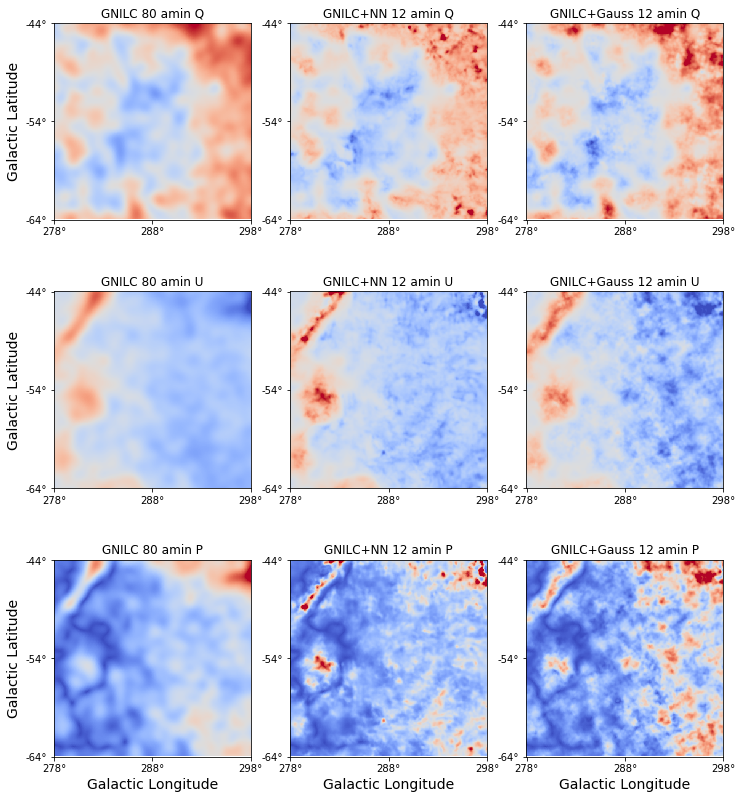

In [24]:
N = 33
P_LS = np.sqrt(LSmapQ[N]**2.+LSmapU[N]**2)
P_SS = np.sqrt(SSmapQ[N]**2.+SSmapU[N]**2)
P_NN = np.sqrt(NNmapQ_corr[N]**2.+NNmapU_corr[N]**2)


cmap = 'coolwarm'
plt.figure(figsize=(12, 14))

plt.subplot(331)
plt.imshow(LSmapQ[N], cmap=cmap, vmin=-30, vmax=30)
plt.title('GNILC 80 amin Q')
plt.xticks((0, 160, 320), ('278°', '288°', '298°') )
plt.yticks((0, 160, 320), ('-44°', '-54°', '-64°') )
plt.ylabel('Galactic Latitude', fontsize=14)

plt.subplot(332)
plt.imshow(NNmapQ_corr[N], cmap=cmap, vmin=-30, vmax=30)
plt.title('GNILC+NN 12 amin Q')
plt.xticks((0, 160, 320), ('278°', '288°', '298°') )
plt.yticks((0, 160, 320), ('-44°', '-54°', '-64°') )

plt.subplot(333)
plt.imshow(SSmapQ[N], cmap=cmap, vmin=-30, vmax=30)
plt.title('GNILC+Gauss 12 amin Q')
plt.xticks((0, 160, 320), ('278°', '288°', '298°') )
plt.yticks((0, 160, 320), ('-44°', '-54°', '-64°') )

plt.subplot(334)
v = 60
plt.imshow(LSmapU[N], cmap=cmap, vmin=-60, vmax=60)
plt.title('GNILC 80 amin U')
plt.xticks((0, 160, 320), ('278°', '288°', '298°') )
plt.yticks((0, 160, 320), ('-44°', '-54°', '-64°') )
plt.ylabel('Galactic Latitude', fontsize=14)

plt.subplot(335)
plt.imshow(NNmapU_corr[N], cmap=cmap, vmin=-60, vmax=60)
plt.title('GNILC+NN 12 amin U')
plt.xticks((0, 160, 320), ('278°', '288°', '298°') )
plt.yticks((0, 160, 320), ('-44°', '-54°', '-64°') )

plt.subplot(336)
plt.imshow(SSmapU[N], cmap=cmap, vmin=-60, vmax=60)
plt.title('GNILC+Gauss 12 amin U')
plt.xticks((0, 160, 320), ('278°', '288°', '298°') )
plt.yticks((0, 160, 320), ('-44°', '-54°', '-64°') )

plt.subplot(337)
v = 60
plt.imshow(P_LS, cmap=cmap, vmin=0, vmax=60)
plt.title('GNILC 80 amin P')
plt.xticks((0, 160, 320), ('278°', '288°', '298°') )
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('-44°', '-54°', '-64°') )
plt.ylabel('Galactic Latitude', fontsize=14)

plt.subplot(338)
plt.imshow(P_NN, cmap=cmap, vmin=0, vmax=60)
plt.title('GNILC+NN 12 amin P')
plt.xticks((0, 160, 320), ('278°', '288°', '298°') )
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('-44°', '-54°', '-64°') )

plt.subplot(339)
plt.imshow(P_SS, cmap=cmap, vmin=0, vmax=60)
plt.title('GNILC+Gauss 12 amin P')
plt.xticks((0, 160, 320), ('278°', '288°', '298°') )
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('-44°', '-54°', '-64°') )

In [25]:
f_NN = nmt.NmtFieldFlat(Lx, Ly, mask, [NNmapQ_corr[N], NNmapU_corr[N]], purify_b=True)
w22 = nmt.NmtWorkspaceFlat()
w22.compute_coupling_matrix(f_NN, f_NN, b)
cl_NN_coupled = nmt.compute_coupled_cell_flat(f_NN, f_NN, b)
cl_NN_uncoupled = w22.decouple_cell(cl_NN_coupled)
f_LS = nmt.NmtFieldFlat(Lx, Ly, mask, [LSmapQ[N], LSmapU[N]], purify_b=True)
cl_LS_coupled = nmt.compute_coupled_cell_flat(f_LS, f_LS, b)
cl_LS_uncoupled = w22.decouple_cell(cl_LS_coupled)
f_SS = nmt.NmtFieldFlat(Lx, Ly, mask, [SSmapQ[N], SSmapU[N]], purify_b=True)
cl_SS_coupled = nmt.compute_coupled_cell_flat(f_SS, f_SS, b)
cl_SS_uncoupled = w22.decouple_cell(cl_SS_coupled)

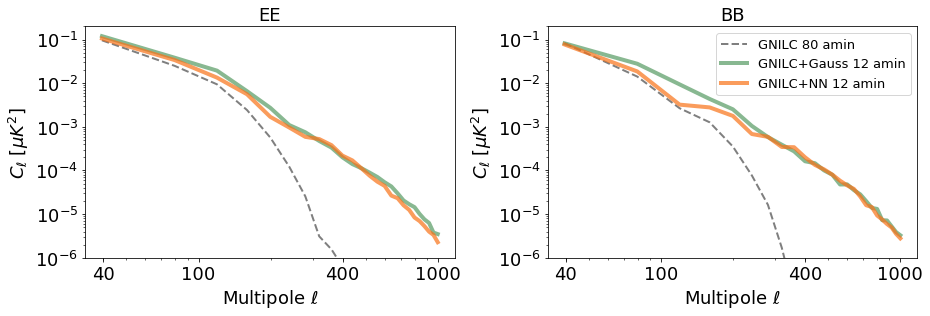

In [26]:
plt.figure(figsize=(13, 4.5))
plt.subplot(121)
plt.loglog(ells_uncoupled, cl_LS_uncoupled[0],  '--', lw=2, color='Black', alpha=0.5, label = 'GNILC 80 amin')
plt.loglog(ells_uncoupled, cl_SS_uncoupled[0], '-', label='GNILC+Gauss 12 amin', lw=4, color='#569A62', alpha=0.7)
plt.loglog(ells_uncoupled, cl_NN_uncoupled[0], '-', label='GNILC+NN 12 amin', lw=4, color='#F87217', alpha=0.7)
plt.ylabel(r'$C_\ell$', fontsize=16)
plt.ylim(1e-6, 2e-1)
plt.xticks([40, 100, 400, 1000], [40, 100, 400, 1000])
plt.tick_params(axis='both', which='major', labelsize=18)
plt.title('EE', fontsize=18)
plt.xlabel(r'Multipole $\ell$', fontsize=18)
plt.ylabel(r'$C_\ell$ [$\mu K^2$]', fontsize=18)
plt.tight_layout()

plt.subplot(122)
plt.loglog(ells_uncoupled, cl_LS_uncoupled[3],  '--', lw=2, color='Black', alpha=0.5, label = 'GNILC 80 amin')
plt.loglog(ells_uncoupled, cl_SS_uncoupled[3], '-', label='GNILC+Gauss 12 amin', lw=4, color='#569A62', alpha=0.7)
plt.loglog(ells_uncoupled, cl_NN_uncoupled[3], '-', label='GNILC+NN 12 amin', lw=4, color='#F87217', alpha=0.7)
plt.ylabel(r'$C_\ell$', fontsize=16)
plt.ylim(1e-6, 2e-1)
plt.legend(fontsize=13)
plt.xticks([40, 100, 400, 1000], [40, 100, 400, 1000])
plt.tick_params(axis='both', which='major', labelsize=18)
plt.title('BB', fontsize=18)
plt.xlabel(r'Multipole $\ell$', fontsize=18)
plt.ylabel(r'$C_\ell$ [$\mu K^2$]', fontsize=18)
plt.tight_layout()
